In [1]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from PIL import Image

up = plt.imread("Planet-Jupiter.jpg")
up.shape

FileNotFoundError: [Errno 2] No such file or directory: 'Planet-Jupiter.jpg'

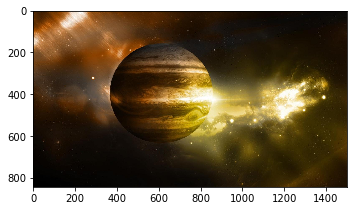

In [2]:
def plti(up, h=10, **kwargs):
    y = up.shape[0]
    x = up.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(up, interpolation="none", **kwargs)
    plt.axis('on')

plti(up)

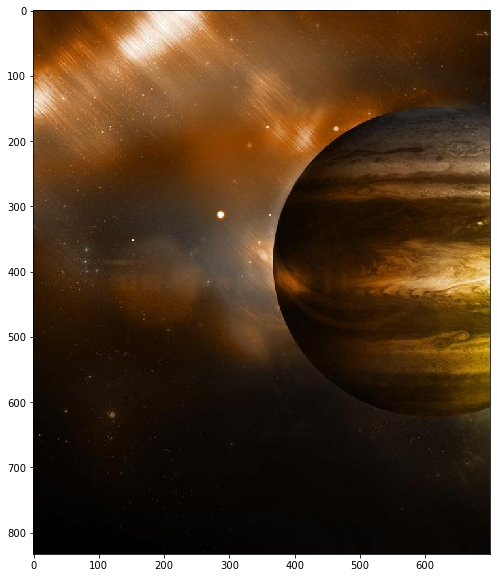

In [15]:
up1= up[10:2000,:700,:]    
plti(up1)



In [16]:
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
from PIL import Image

upn = plt.imread("imagesa.jfif")


<ipython-input-17-b38b1314460e>:2: RuntimeWarning: divide by zero encountered in true_divide
  return -np.log(1/((1 + upn)/255)-1)
<ipython-input-17-b38b1314460e>:2: RuntimeWarning: divide by zero encountered in log
  return -np.log(1/((1 + upn)/255)-1)


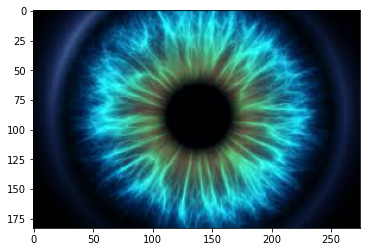

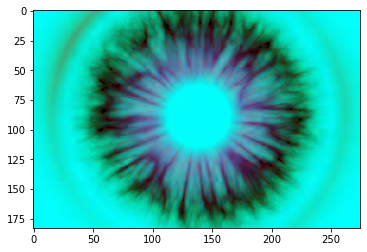

In [17]:
def do_normalise(upn):
    return -np.log(1/((1 + upn)/255)-1)
 
def undo_normalise(upn):
    return (1 + 1/(np.exp(-upn) + 1) * 255).astype("uint8")

def rotation_matrix(theta):
     return np.c_[
        [1,0,0],
        [0,np.cos(theta),-np.sin(theta)],
        [0,np.sin(theta),np.cos(theta)]
    ]

up_normed = do_normalise(upn)
up_rotated = np.einsum("ijk,lk->ijl", up_normed, rotation_matrix(np.pi))
up2 = undo_normalise(up_rotated)


imgplot = plt.imshow(upn)
plt.show()

imgplot = plt.imshow(up2)
plt.show()


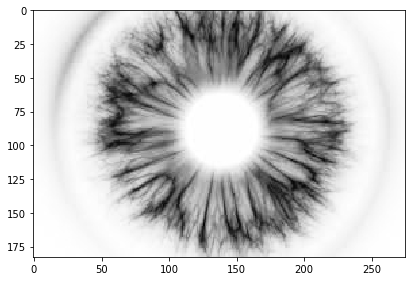

In [18]:
def to_grayscale(upn, weights = np.c_[0.2989, 0.5870, 0.1140]):
    """
    Transforms a colour image to a greyscale image by taking the mean of the RGB values, weighted
    by the matrix weights """
    
    tile = np.tile(weights, reps=(upn.shape[0],upn.shape[1],1))
    return np.sum(tile * upn, axis=2)


img = to_grayscale(upn)
plti(img, cmap='Greys')

In [20]:
from scipy.ndimage.interpolation import zoom
im_small = zoom(up, (0.2,0.2,1))

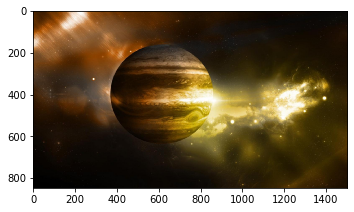

In [33]:
from scipy.signal import convolve2d

def convolve_all_colours(upn, window):
    """ Convolves (up) with window, over all three colour channels """
    ims = []
    for d in range(3):
        im_conv_d = convolve2d(up[:,:,d], window, mode="full", boundary="symm")
        ims.append(im_conv_d)

    im_conv = np.stack(ims, axis=2).astype("uint")
    
    return im_conv

n=4
window = np.ones((n,n))
window /= np.sum(window)
plti(convolve_all_colours(im_small, window))


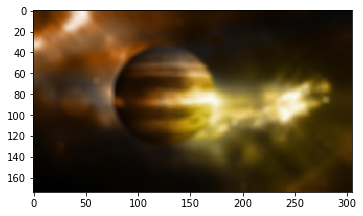

In [27]:
from scipy.signal import convolve2d

def convolve_all_colours(up, window):
   
    ims = []
    for d in range(3):
        im_conv_d = convolve2d(up[:,:,d], window, mode="full", boundary="symm")
        ims.append(im_conv_d)

    im_conv = np.stack(ims, axis=2).astype("uint")
    
    return im_conv

n=6
window = np.ones((n,n))
window /= np.sum(window)
plti(convolve_all_colours(im_small, window))


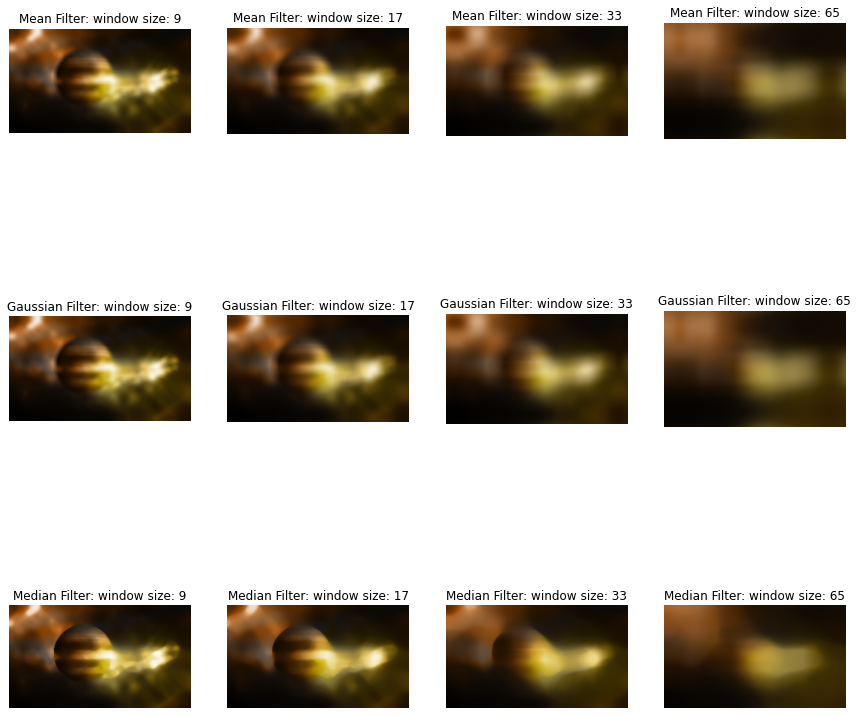

In [29]:
from scipy.ndimage import median_filter

def make_gaussian_window(n, sigma=1):
    """
    Creates a square window of size n by n of weights from a gaussian
    of width sigma.
    """
    nn = int((n-1)/2)
    a = np.asarray([[x**2 + y**2 for x in range(-nn,nn+1)] for y in range(-nn,nn+1)])
    return np.exp(-a/(2*sigma**2))

def median_filter_all_colours(im_small, window_size):
    """
    Applies a median filer to all colour channels
    """
    ims = []
    for d in range(3):
        im_conv_d = median_filter(im_small[:,:,d], size=(window_size,window_size))
        ims.append(im_conv_d)

    im_conv = np.stack(ims, axis=2).astype("uint8")
    
    return im_conv

window_sizes = [9,17,33,65]
fig, axs = plt.subplots(nrows=3, ncols=len(window_sizes), figsize=(15,15));

# mean filter
for w, ax in zip(window_sizes, axs[0]):
    window = np.ones((w,w))
    window /= np.sum(window)
    ax.imshow(convolve_all_colours(im_small, window));
    ax.set_title("Mean Filter: window size: {}".format(w));
    ax.set_axis_off();
    
# gaussian filter
for w, ax in zip(window_sizes, axs[1]):
    window = make_gaussian_window(w,sigma=w)
    window /= np.sum(window)
    ax.imshow(convolve_all_colours(im_small, window));
    ax.set_title("Gaussian Filter: window size: {}".format(w));
    ax.set_axis_off();
    
# median filter
for w, ax in zip(window_sizes, axs[2]):
    ax.imshow(median_filter_all_colours(im_small, w));
    ax.set_title("Median Filter: window size: {}".format(w));
    ax.set_axis_off();